### TASK

Develop and deploy machine
learning models in any one of the following areas only and analyse the results.

##### Public Transport

Project questions could be: (this is a small, suggested, sample of questions, other questions may be more
appropriate to your project)

– How to measure similarity or dissimilarity between different clusters?
– Which clustering solution do you prefer, and why?
– How to analyse and investigate an inflation rate for a specific product?

You will present their findings and defend the results in the report (MS Doc). Your report should capture the
following aspects that are relevant to your project investigations.

i) A precise introduction, motivation, description of problem domain, project objectives and the
rationale for the chosen dataset in the above-mentioned areas.


ii) Which clustering algorithms would you consider for segmentation, and why? Explain the differences
between silhouette score and Davies-Bouldin index in the context of clustering. Compare the results
obtained from any two clustering algorithms from the chosen dataset.


iii) What insights can you derive from the initial exploration of the time series data based on the
provided topics? Describe any trends, seasonality, or anomalies observed. How did you determine
the appropriate parameters (p, d, q) for the ARIMA model. Evaluate the performance of the ARIMA
model in forecasting future values, highlighting any strengths and limitations based on your chosen
dataset.


iv) Interpret and justify the results based on the problem specification or project objectives by using
suitable visualizations. Comments and description of Python code, conclusions of the project should
be specified in the report as well as jupyter notebook. Citations and references should be in the
Harvard Style.


#### Note: You can choose two different datasets for task (ii) or task (iii) separately or one dataset for both tasks

### Part I: Data Loading and Cleaning

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing potential future warnings for pandas operations
pd.options.mode.chained_assignment = None

# Step 2: Loading the Dataset
# Load the dataset
df = pd.read_csv('MetroPT3(AirCompressor).csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,01/02/2020 00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1,0,1,1,0,1,1,1
1,10,01/02/2020 00:00,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1,0,1,1,0,1,1,1
2,20,01/02/2020 00:00,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1,0,1,1,0,1,1,1
3,30,01/02/2020 00:00,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1,0,1,1,0,1,1,1
4,40,01/02/2020 00:00,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1,0,1,1,0,1,1,1


In [2]:
# Checking the total number of rows in the dataset
total_rows = len(df)
print(f"Total number of rows in the dataset: {total_rows}")


Total number of rows in the dataset: 1048575


In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [4]:
# Step 3: Data Cleaning
# Checking for missing values in the dataset
print(df.isnull().sum())


Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [5]:
# Fill missing values with the median:
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert 'timestamp' column to datetime type (if not already)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(df.dtypes)  # To check the data types of each column

Unnamed: 0                  int64
timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                        int64
DV_eletric                  int64
Towers                      int64
MPG                         int64
LPS                         int64
Pressure_switch             int64
Oil_level                   int64
Caudal_impulses             int64
dtype: object


In [6]:
# Step 4: Basic Exploration
# Descriptive statistics for numeric columns
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+06,1.436824e+00,8.963460e+00,7.473877e+00,8.626027e-02,8.964050e+00,6.112691e+01,1.980451e+00,8.266648e-01,1.692192e-01,9.158286e-01,8.218859e-01,2.446177e-03,9.892397e-01,9.855566e-01,9.112863e-01
std,3.026977e+06,3.290119e+00,6.324664e-01,3.402957e+00,4.437627e-01,6.317086e-01,6.690040e+00,2.323514e+00,3.785370e-01,3.749456e-01,2.776448e-01,3.826090e-01,4.939833e-02,1.031724e-01,1.193097e-01,2.843302e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+06,-1.400000e-02,8.468000e+00,8.228000e+00,-2.400000e-02,8.470000e+00,5.620000e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,5.242870e+06,-1.200000e-02,8.930000e+00,8.758000e+00,-2.200000e-02,8.930000e+00,6.030000e+01,4.250000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,7.864305e+06,-1.000000e-02,9.472000e+00,9.356000e+00,-1.800000e-02,9.472000e+00,6.560000e+01,3.825000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.048574e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.312500e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
# Unique values in 'COMP' column which indicates compressor status
print(df['COMP'].unique())

[1 0]


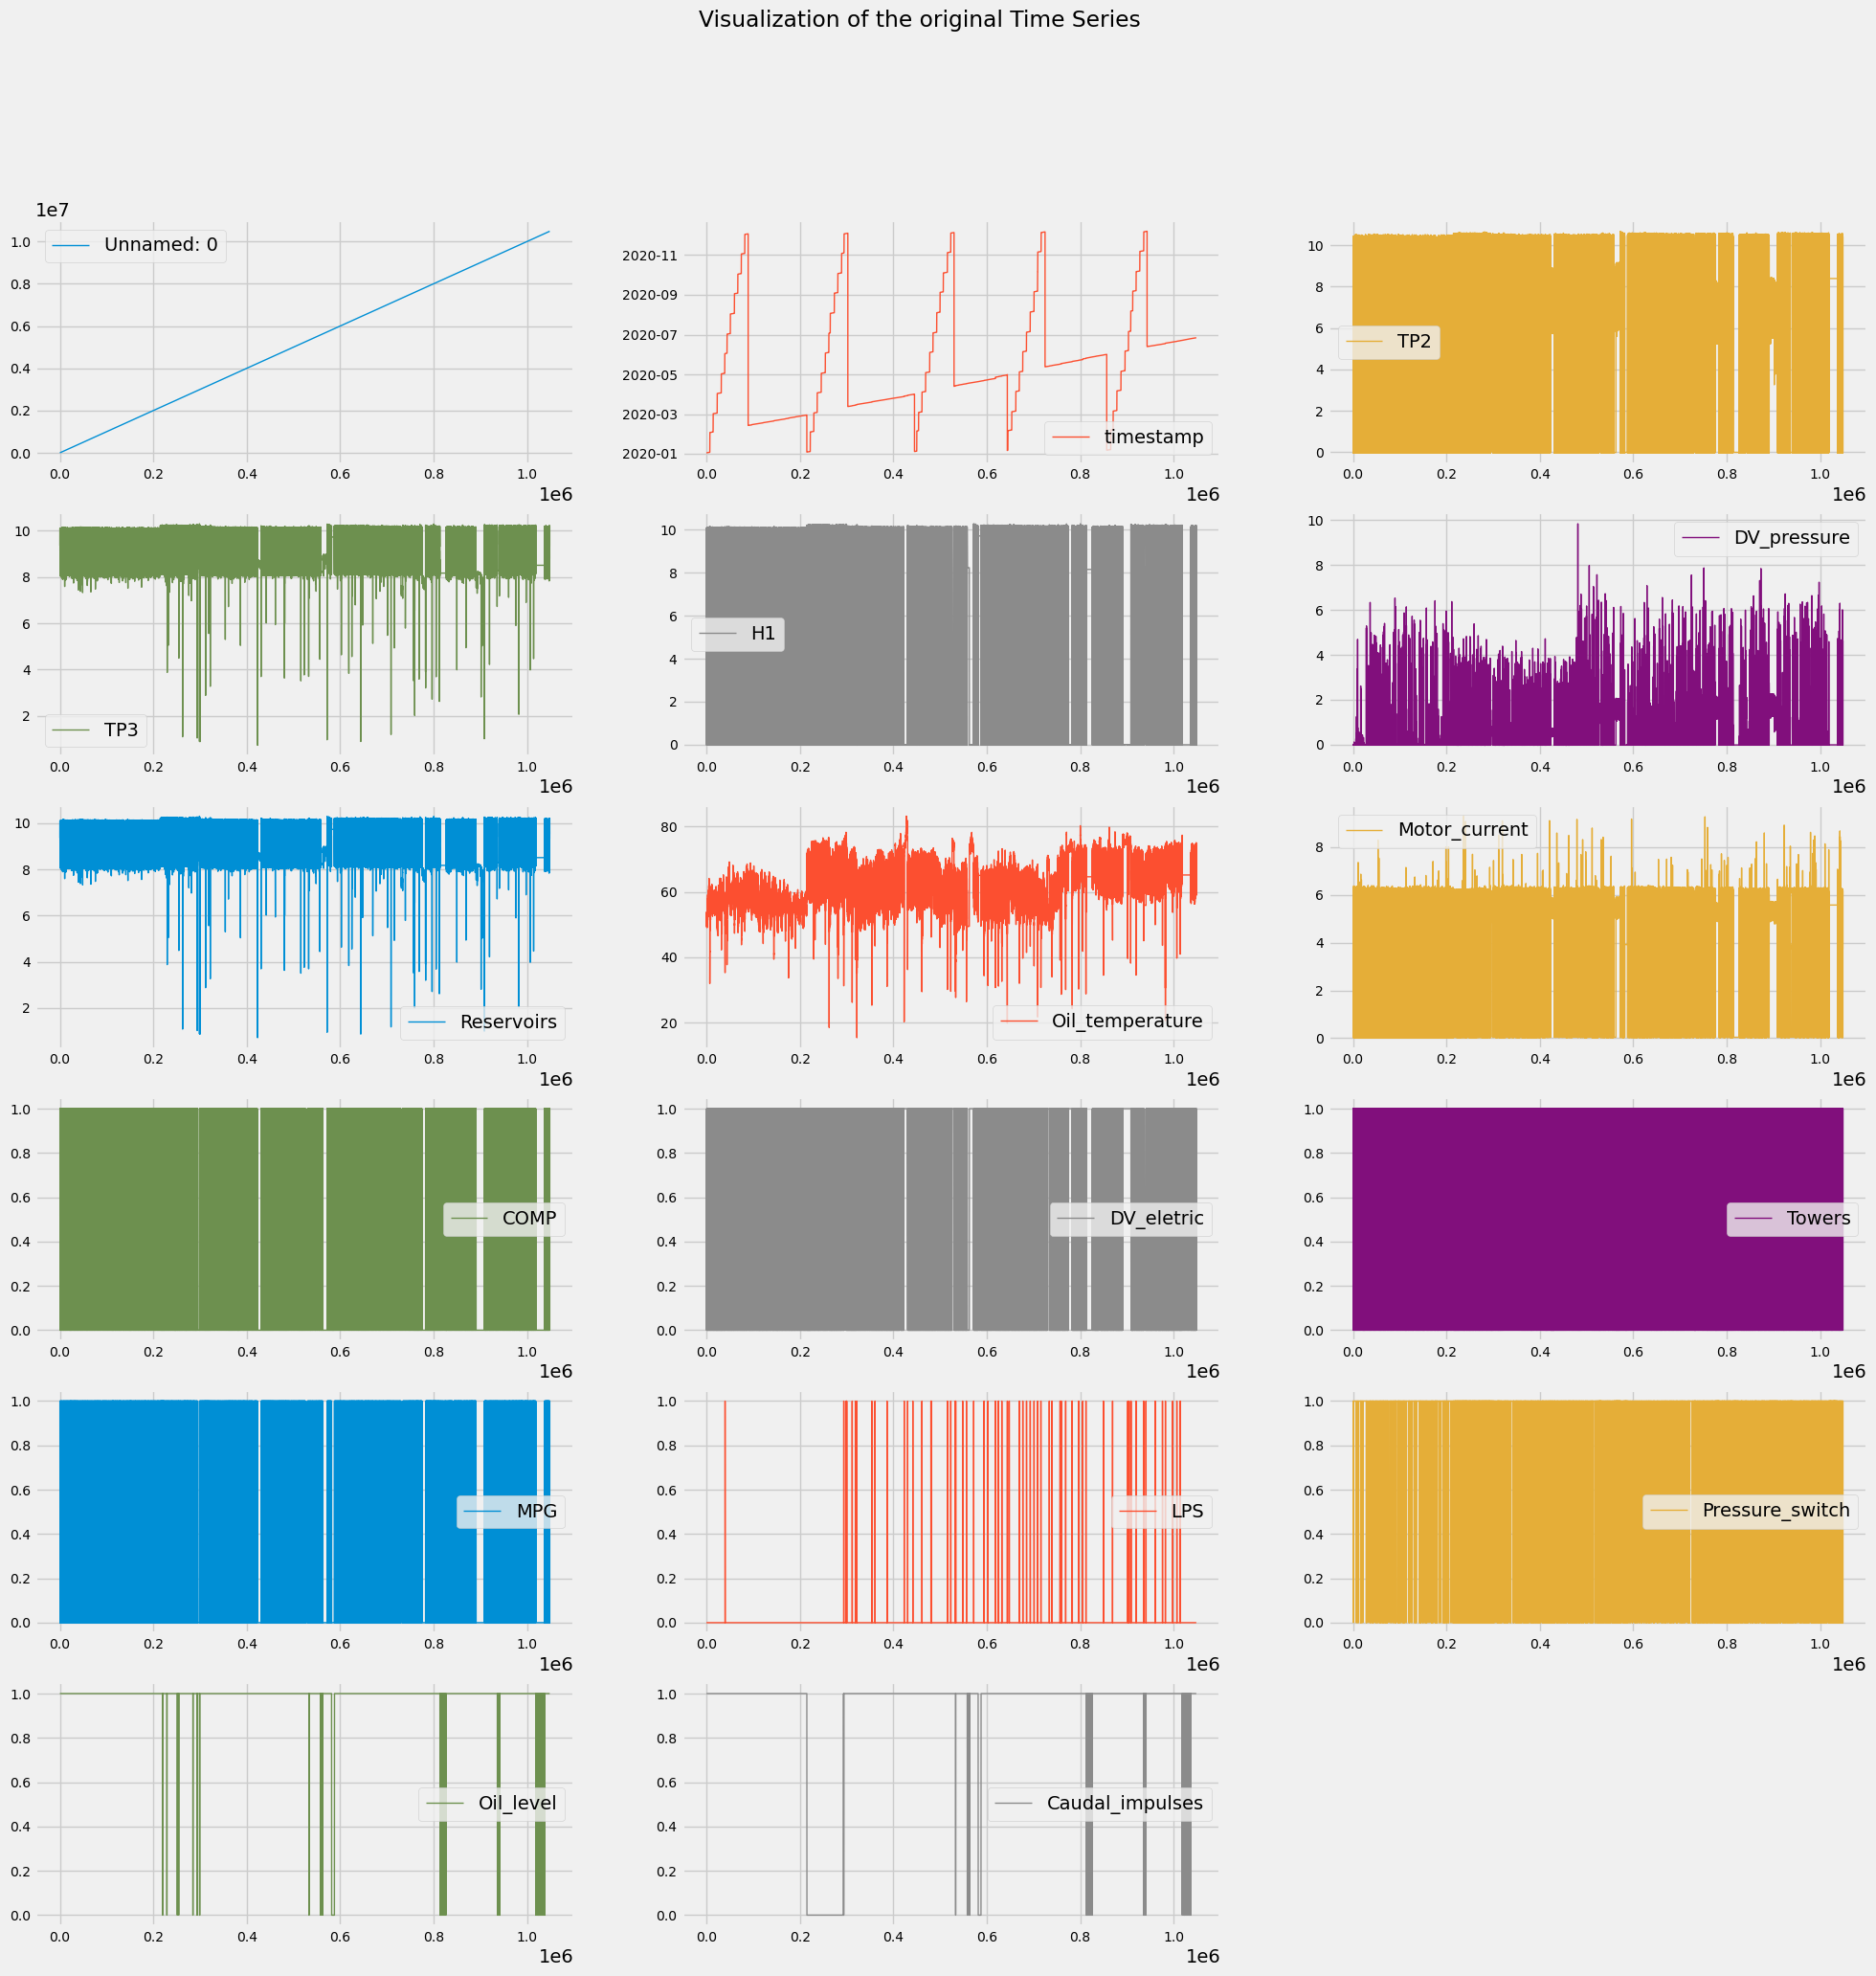

In [8]:
# Plot the time series
plt.style.use('fivethirtyeight')
df.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=1,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

In [9]:
# Convert the 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check the data types again to confirm
df.dtypes

Unnamed: 0                  int64
timestamp          datetime64[ns]
TP2                       float64
TP3                       float64
H1                        float64
DV_pressure               float64
Reservoirs                float64
Oil_temperature           float64
Motor_current             float64
COMP                        int64
DV_eletric                  int64
Towers                      int64
MPG                         int64
LPS                         int64
Pressure_switch             int64
Oil_level                   int64
Caudal_impulses             int64
dtype: object

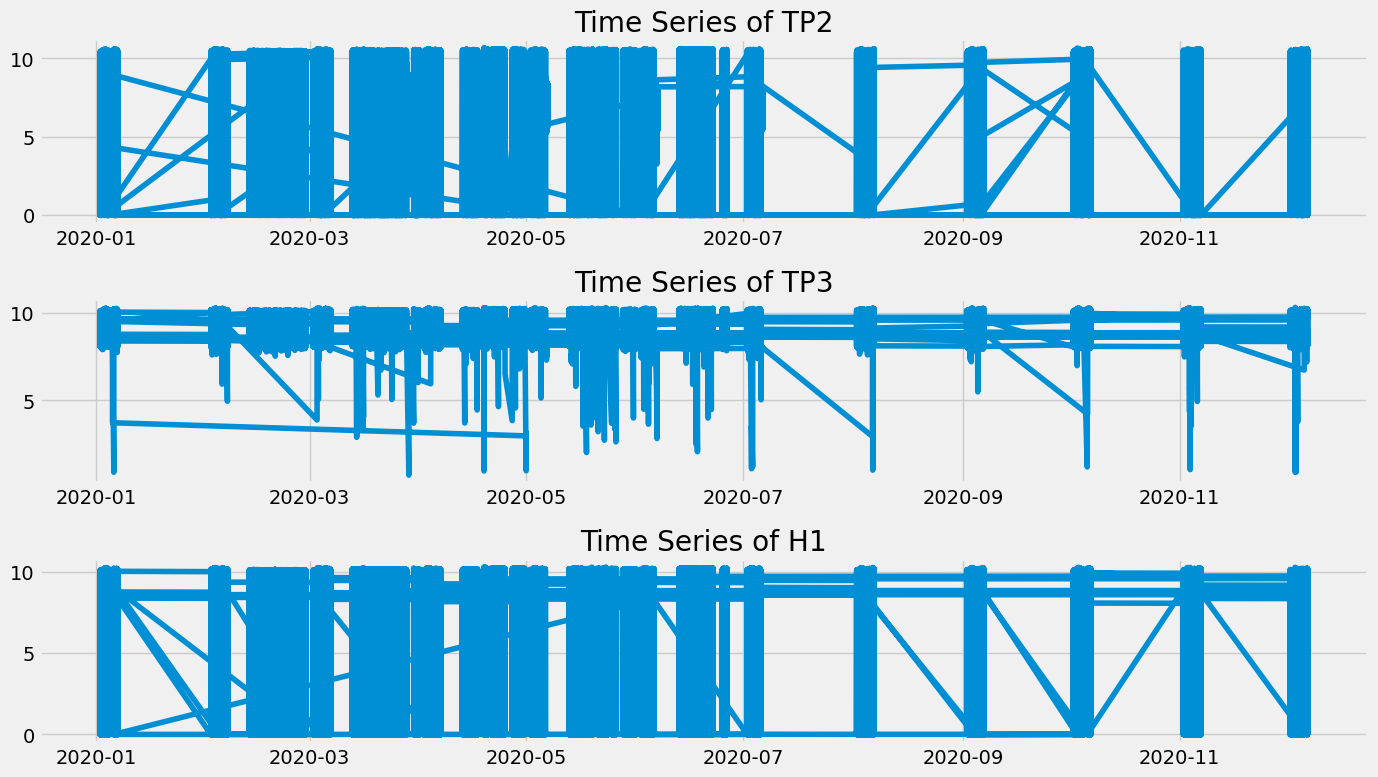

In [10]:
# Plot the time series for 'TP2', 'TP3', and 'H1'
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df['timestamp'], df['TP2'])
plt.title('Time Series of TP2')

plt.subplot(3, 1, 2)
plt.plot(df['timestamp'], df['TP3'])
plt.title('Time Series of TP3')

plt.subplot(3, 1, 3)
plt.plot(df['timestamp'], df['H1'])
plt.title('Time Series of H1')

plt.tight_layout()
plt.show()

### Part II: Clustering Algorithms

In [11]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [12]:
# Step 1: Preparing Data for Clustering
# Sample a fraction of the data for quick execution - here, we use 5% of the data
df_sample = df.sample(frac=0.05, random_state=1)

# Considering only numeric columns for clustering (excluding 'timestamp' and 'Unnamed: 0')
df_numeric = df_sample.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [13]:
# Applying K-Means Clustering with n_init explicitly set
kmeans = KMeans(n_clusters=5, random_state=1, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Evaluating the silhouette score
silhouette_avg_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")

Silhouette Score for K-Means: 0.3831580162458047


In [14]:
from sklearn.cluster import KMeans

# Initialize k_means by calling an object KMeans()
k_means = KMeans(n_clusters=4, random_state=42)

# Train the model using the fit() method
# Ensure that the columns you want to use for clustering are correctly indexed
k_means.fit(df[['Motor_current', 'Oil_temperature']])

C:\Users\35383\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [15]:
# Create an additional column in the dataframe (df) as KMeans_labels
df['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,KMeans_labels
0,0,2020-01-02,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1,0,1,1,0,1,1,1,0
1,10,2020-01-02,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1,0,1,1,0,1,1,1,0
2,20,2020-01-02,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1,0,1,1,0,1,1,1,0
3,30,2020-01-02,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1,0,1,1,0,1,1,1,0
4,40,2020-01-02,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1,0,1,1,0,1,1,1,0


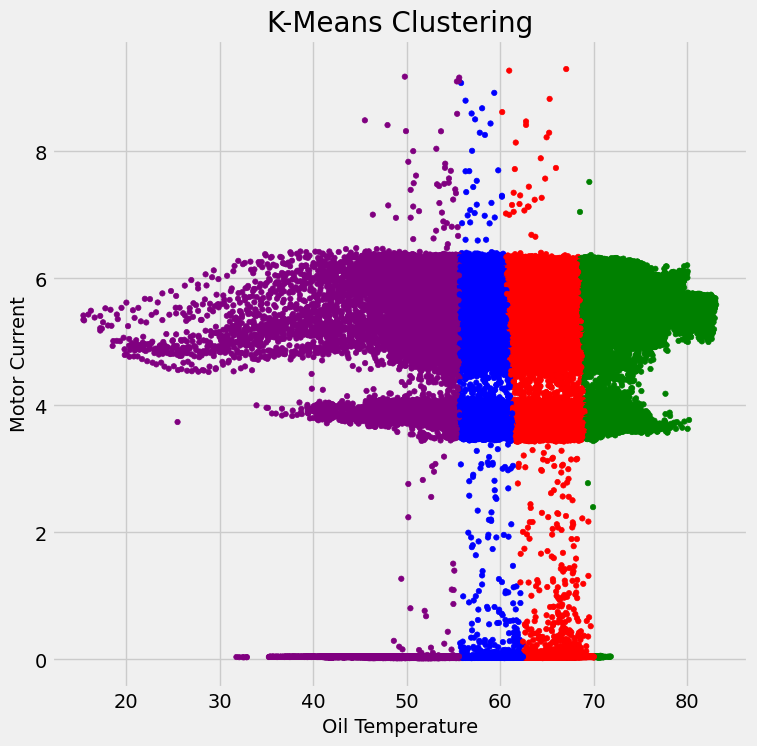

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the array of colors
colors = ['purple', 'red', 'blue', 'green']

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Use scatter function to plot all three columns in the form of circles
plt.scatter(df['Oil_temperature'], df['Motor_current'], c=df['KMeans_labels'], cmap=mcolors.ListedColormap(colors), s=15)
plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Oil Temperature', fontsize=14)
plt.ylabel('Motor Current', fontsize=14)
plt.show()

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Step 3: DBSCAN Clustering
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Check if there are noise points (-1)
if -1 in dbscan_labels:
    # Exclude noise points for silhouette score calculation
    silhouette_avg_dbscan = silhouette_score(df_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")

Silhouette Score for DBSCAN: 0.4079649257710106


C:\Users\35383\AppData\Local\Temp\ipykernel_19204\1271610294.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_scaled[dbscan_labels == label][:, 0], df_scaled[dbscan_labels == label][:, 1], c=color, label=label, s=15, marker='o', edgecolor='k', alpha=0.5)


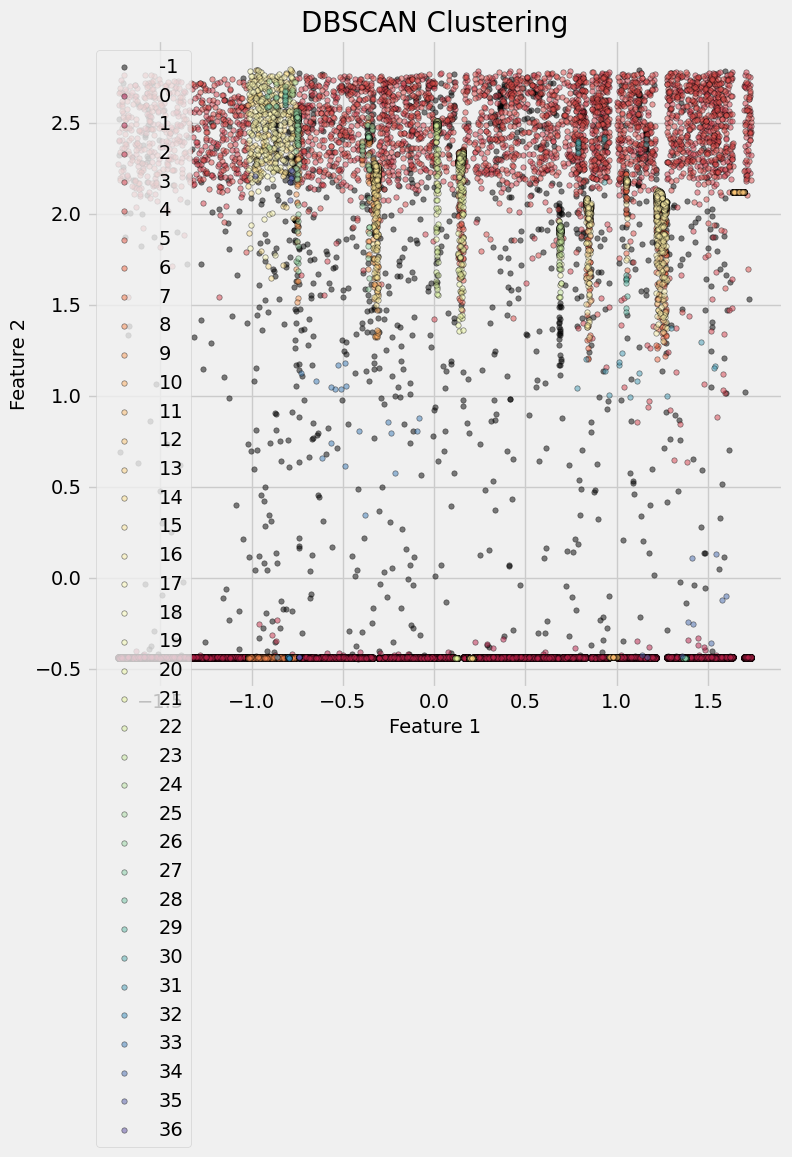

In [18]:
# Assuming you have already scaled your data and obtained the cluster labels
# For example, assuming 'df_scaled' contains your scaled data and 'dbscan_labels' contains the cluster labels
# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the DBSCAN model
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 8))

# Plotting the points with different colors based on cluster labels
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black color for noise points
        color = 'black'
    # Plot circles for current cluster label
    plt.scatter(df_scaled[dbscan_labels == label][:, 0], df_scaled[dbscan_labels == label][:, 1], c=color, label=label, s=15, marker='o', edgecolor='k', alpha=0.5)

plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.show()

### Part III: Analysis and Interpretation

### **Analyzing Cluster Results**

After applying clustering algorithms and obtaining silhouette scores, the next step involves analyzing these clusters to derive insights. Silhouette scores provide a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.


### **Interpretation of Clustering Results**
Compare the silhouette scores for K-Means and DBSCAN. A higher silhouette score suggests that the algorithm performed better in segmenting the data into distinct, well-separated clusters. Given the silhouette scores you have:

   - K-Means: 0.3831580162458047
   - DBSCAN: 0.4079649257710106

DBSCAN shows a higher silhouette score, indicating better performance in this context, likely due to its ability to handle noise and identify outliers, making it more suited for complex cluster shapes.


### **Why DBSCAN might be preferred**
Given your dataset and the silhouette scores, DBSCAN might be preferred due to its flexibility in handling various cluster shapes and densities, which is often the case in real-world datasets like yours.